<a href="https://colab.research.google.com/github/Vardhaaaan/Neural-networks-and-Deep-learning-/blob/main/Digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9073 - loss: 0.2970 - val_accuracy: 0.9865 - val_loss: 0.0390
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9858 - loss: 0.0439 - val_accuracy: 0.9872 - val_loss: 0.0346
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9907 - loss: 0.0285 - val_accuracy: 0.9886 - val_loss: 0.0308
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9891 - val_loss: 0.0350
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9953 - loss: 0.0164 - val_accuracy: 0.9899 - val_loss: 0.0309
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9873 - loss: 0.0393
Test Accuracy: 0.9898999929428101
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


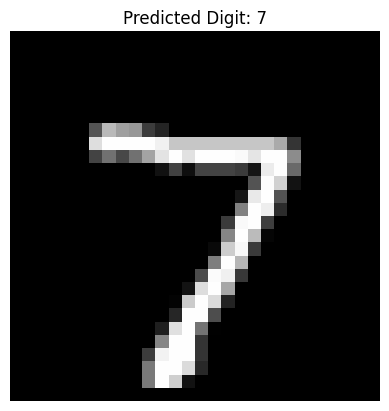

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

# Predict and visualize
prediction = model.predict(x_test)

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted Digit: {prediction[0].argmax()}")
plt.axis('off')
plt.show()

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 106s 123ms/step - left_digit_accuracy: 0.8540 - left_digit_loss: 0.4494 - loss: 0.9156 - right_digit_accuracy: 0.8549 - right_digit_loss: 0.4662 - val_left_digit_accuracy: 0.9828 - val_left_digit_loss: 0.0603 - val_loss: 0.1309 - val_right_digit_accuracy: 0.9772 - val_right_digit_loss: 0.0704
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 137s 118ms/step - left_digit_accuracy: 0.9819 - left_digit_loss: 0.0595 - loss: 0.1106 - right_digit_accuracy: 0.9840 - right_digit_loss: 0.0511 - val_left_digit_accuracy: 0.9857 - val_left_digit_loss: 0.0492 - val_loss: 0.1261 - val_right_digit_accuracy: 0.9753 - val_right_digit_loss: 0.0768
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 119ms/step - left_digit_accuracy: 0.9881 - left_digit_loss: 0.0371 - loss: 0.0679 - right_digit_accuracy: 0.9896 - right_digit_loss: 0.0308 - val_left_digit_accuracy: 0.9880 - val_left_digit_loss: 0.0460 - val_loss: 0.0872 - val_right_digit_accuracy: 0.9872 - val_right_digit_loss: 0.0409
E

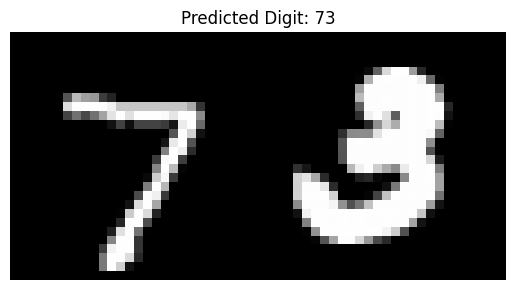

In [2]:
# Imports

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Load MNIST dataset

# x_train, x_test: images (28x28 grayscale)
# y_train, y_test: digit labels (0–9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create double-digit images

def create_double_digit(images, labels):
    """
    Creates images with two digits side-by-side.
    Returns:
        X  -> combined images (28x56x1)
        y1 -> left digit labels
        y2 -> right digit labels
    """
    X, y1, y2 = [], [], []

    for i in range(len(images)):
        # Randomly choose a second image
        j = np.random.randint(0, len(images))

        # Concatenate images horizontally (left + right)
        img = np.concatenate([images[i], images[j]], axis=1)
        X.append(img)

        # Store labels for each digit
        y1.append(labels[i])
        y2.append(labels[j])

    # Convert to NumPy array and add channel dimension
    X = np.array(X)[..., np.newaxis]

    return X, np.array(y1), np.array(y2)

# Generate training and testing data
X_train, y_left_train, y_right_train = create_double_digit(x_train, y_train)
X_test, y_left_test, y_right_test = create_double_digit(x_test, y_test)


# Build the CNN model

inputs = layers.Input(shape=(28, 56, 1))  # Two MNIST digits side by side

# First convolution block
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)

# Second convolution block
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Output heads (multi-output model)
left = layers.Dense(10, activation='softmax', name='left_digit')(x)
right = layers.Dense(10, activation='softmax', name='right_digit')(x)

# Define the model
model = models.Model(inputs, [left, right])


# Compile the model

model.compile(
    optimizer='adam',
    loss={
        'left_digit': 'sparse_categorical_crossentropy',
        'right_digit': 'sparse_categorical_crossentropy'
    },
    metrics={
        'left_digit': 'accuracy',
        'right_digit': 'accuracy'
    }
)


# Train the model

model.fit(
    X_train,
    {
        'left_digit': y_left_train,
        'right_digit': y_right_train
    },
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


# Test on one image

idx = 0  # Change index to test different samples
image = X_test[idx:idx+1]

# Predict both digits
pred_left, pred_right = model.predict(image)

# Convert probabilities to digit predictions
d1 = np.argmax(pred_left)
d2 = np.argmax(pred_right)

# Combine digits into a two-digit number
predicted_digit = d1 * 10 + d2


# Display result
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()